<a href="https://colab.research.google.com/github/Anup-Sarkar-DD/GoogleColab_repo/blob/main/SingleNeuronExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
x, y = make_moons(n_samples=500, noise=0.05)

In [ ]:
df = pd.DataFrame(dict(x1=x[:,0],x2=x[:,1] ,label = y))

In [ ]:
df.head(2)

,x1,x2,label
0,-0.807264,0.305993,0
1,0.492561,0.869746,0


In [ ]:
df.isnull().sum()

,0
x1,0
x2,0
label,0


In [ ]:
df.describe()

,x1,x2,label
count,500.000000,500.000000,500.000000
mean,0.498694,0.249142,0.500000
std,0.867109,0.497542,0.500501
min,-1.076451,-0.678281,0.000000
25%,-0.039648,-0.186630,0.000000
50%,0.499146,0.254401,0.500000
75%,1.047245,0.692383,1.000000
max,2.092392,1.094115,1.000000


<Axes: xlabel='x1', ylabel='x2'>

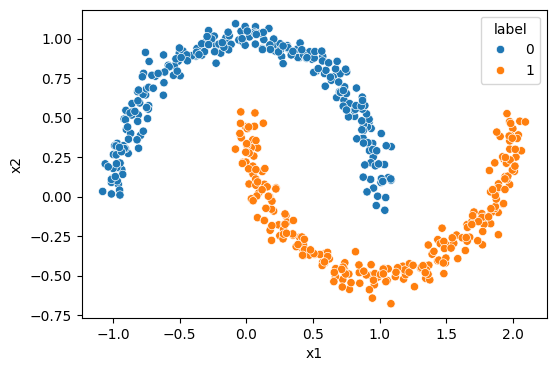

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='x1',y='x2',hue='label',data=df)

In [ ]:
x = df.iloc[:,:-1]

In [ ]:
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Perceptron as p

In [ ]:
pr = p()
pr.fit(x_train,y_train)

Perceptron()

Score:  91.0
trainScore 83.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


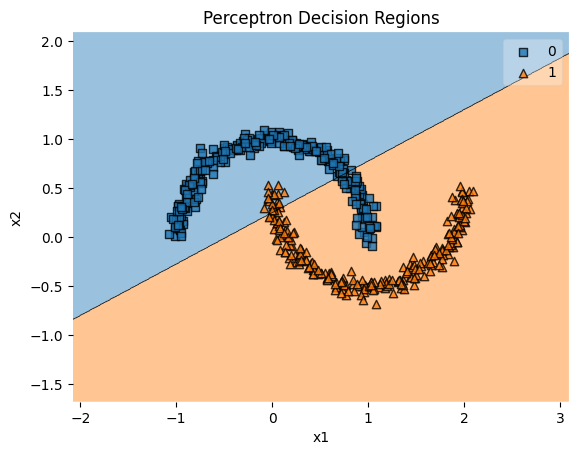

In [ ]:
# prompt: what should be my next step(get score and see visual use scatter plot

print('Score: ',pr.score(x_test,y_test)*100)
print('trainScore', pr.score(x_train,y_train)*100)
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values,clf=pr)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Regions')
plt.show()

Best Parameters:  {'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l2', 'shuffle': True, 'tol': 0.001}
Best Cross-Validation Score:  0.865
Tuned Model Test Score:  92.0
Tuned Model Train Score:  85.75


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


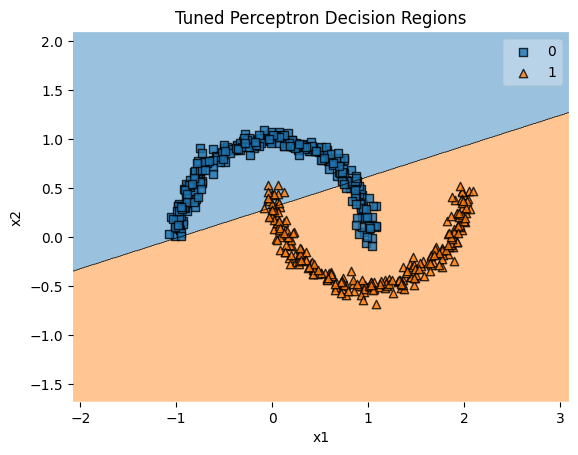

In [ ]:
# prompt: let fix train as it is only 83 and test is 91 .. lets do hyperparemter tuning for preceptron

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-3, 1e-4, 1e-5],
    'shuffle': [True, False]
}

# Create a Perceptron model
perceptron = p()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-Validation Score: ", best_score)

# Train a new Perceptron model with the best parameters
best_perceptron = p(**best_params)
best_perceptron.fit(x_train, y_train)

# Evaluate the best model on the test set
test_score = best_perceptron.score(x_test, y_test) * 100
train_score_tuned = best_perceptron.score(x_train, y_train) * 100


print('Tuned Model Test Score: ', test_score)
print('Tuned Model Train Score: ', train_score_tuned)


# Plot decision regions for the best model
plot_decision_regions(x.values, y.values, clf=best_perceptron)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Tuned Perceptron Decision Regions')
plt.show()